In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [2]:
#Data Description text file
file = open(r'../input/house-prices-advanced-regression-techniques/data_description.txt','r')
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Missing data or null

train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# Missing data or null

test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [10]:
#drop ID
train.drop(labels='Id',axis=1,inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Split categorical and numerical variable

num_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
            'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','YearBuilt','YearRemodAdd','SalePrice',
            'MoSold','YrSold']

obj_cols = [col for col in train.columns if train[col].dtype == "object" or col not in num_cols]

There are 3 numerical features which are categorical (obj_cols): 'MSSubClass','OverallQual', and 'OverallCond'

In [13]:
obj_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In the preprocessing phase for categorical variables, ordinal variables will be preprocessed using label encoding. On the other hand, nominal variables will be preprocessed using one-hot encoding.

In [14]:
train[['LotShape','LandSlope','OverallQual','OverallCond',
                'ExterQual','ExterCond','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1','BsmtFinType2',
                'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                'GarageCond','PoolQC']]

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Reg,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,NaN,TA,TA,NaN
1,Reg,Gtl,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,NaN
2,IR1,Gtl,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,NaN
3,IR1,Gtl,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,TA,TA,NaN
4,IR1,Gtl,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,6,5,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA,TA,NaN
1456,Reg,Gtl,6,6,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,TA,NaN
1457,Reg,Gtl,7,9,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Gd,TA,TA,NaN
1458,Reg,Gtl,5,6,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,NaN,TA,TA,NaN


In [15]:
ordinal_cols = ['LotShape','LandSlope','OverallQual','OverallCond',
                'ExterQual','ExterCond','BsmtQual','BsmtCond',
                'BsmtExposure','BsmtFinType1','BsmtFinType2',
                'HeatingQC','KitchenQual','FireplaceQu','GarageQual',
                'GarageCond','PoolQC']

In [16]:
train[ordinal_cols]

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Reg,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,NaN,TA,TA,NaN
1,Reg,Gtl,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA,TA,NaN
2,IR1,Gtl,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA,TA,NaN
3,IR1,Gtl,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Gd,TA,TA,NaN
4,IR1,Gtl,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gtl,6,5,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,TA,TA,TA,NaN
1456,Reg,Gtl,6,6,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,TA,NaN
1457,Reg,Gtl,7,9,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Gd,TA,TA,NaN
1458,Reg,Gtl,5,6,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,NaN,TA,TA,NaN


In [17]:
nominal_cols = [col for col in obj_cols if col not in ordinal_cols]

In [18]:
train[nominal_cols]

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Lvl,AllPub,FR2,Veenker,Feedr,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,Lvl,AllPub,Corner,Crawfor,Norm,Norm,...,Y,SBrkr,Typ,Detchd,Unf,Y,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,Lvl,AllPub,FR2,NoRidge,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Lvl,AllPub,Inside,Gilbert,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Lvl,AllPub,Inside,NWAmes,Norm,Norm,...,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Lvl,AllPub,Inside,Crawfor,Norm,Norm,...,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,Y,FuseA,Typ,Attchd,Unf,Y,NaN,NaN,WD,Normal


In [19]:
obj_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

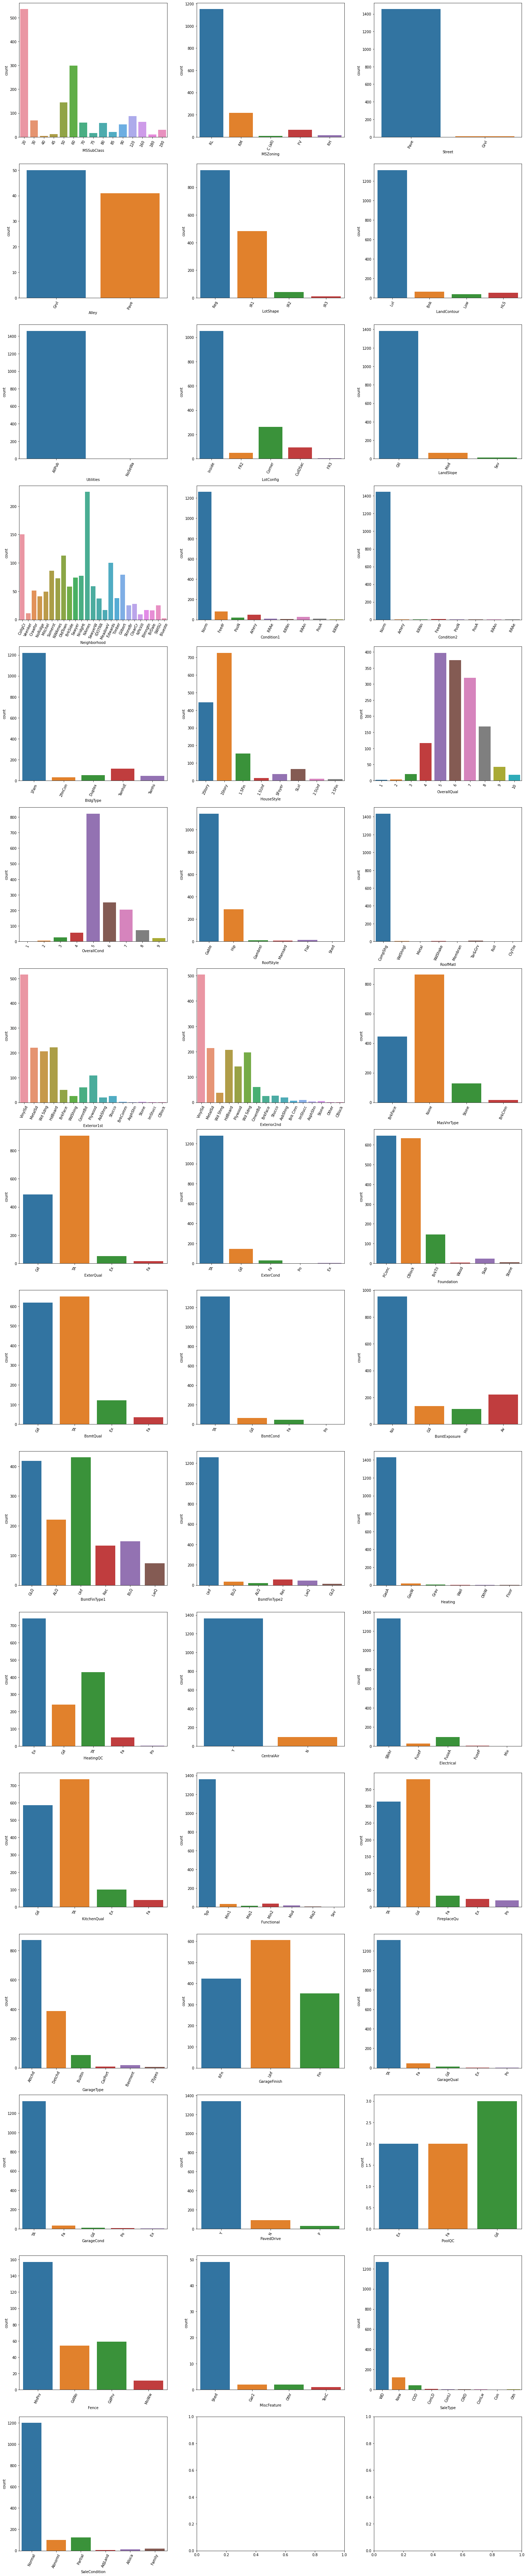

In [20]:
# Categorical variables count
fig, ax = plt.subplots(16, 3, figsize=(25, 130))

for var, subplot in zip(obj_cols, ax.flatten()):
    sns.countplot(train[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(65)

Some features are very imbalanced then it will be harder for the model to predict as most of them will have same values.

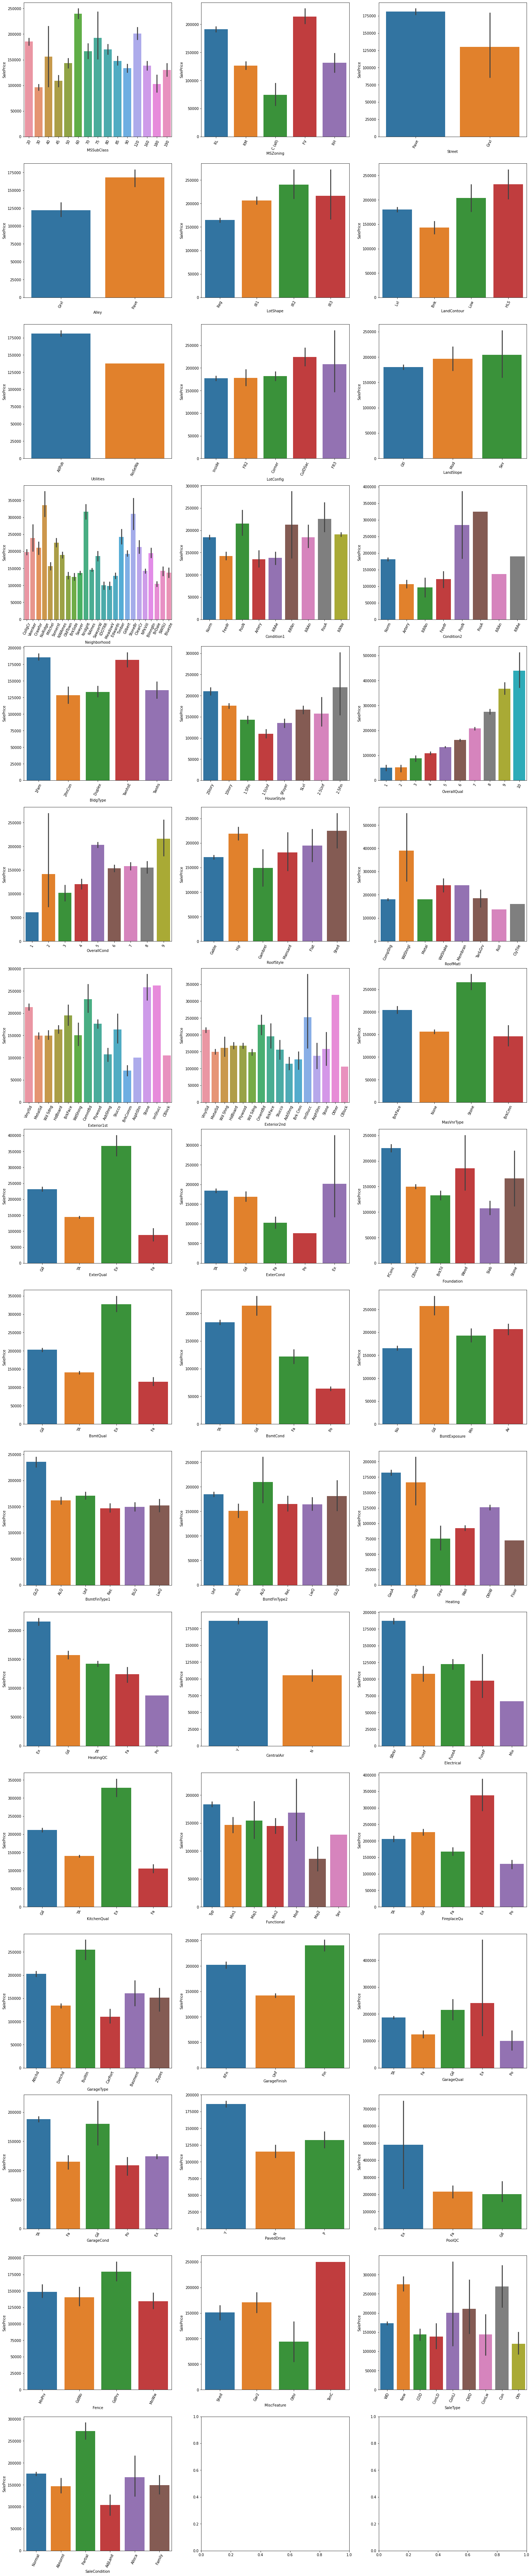

In [21]:
# Categorical variables to SalePrice Mean
from numpy import mean

fig, ax = plt.subplots(16, 3, figsize=(25, 130))

for var, subplot in zip(obj_cols, ax.flatten()):
    sns.barplot(x=var,y='SalePrice',data=train,estimator=mean,ax=subplot)
    
    for label in subplot.get_xticklabels():
        label.set_rotation(65)

- 'OverallQual' is very correlated with 'SalePrice'

- OverallQual: Rates the overall material and finish of the house

We can translate the better quality then the price will be higher. However, OverallQual is imbalanced and concentrated at value 5

Some other features also show ranking by looking at the bar chart.

<AxesSubplot:>

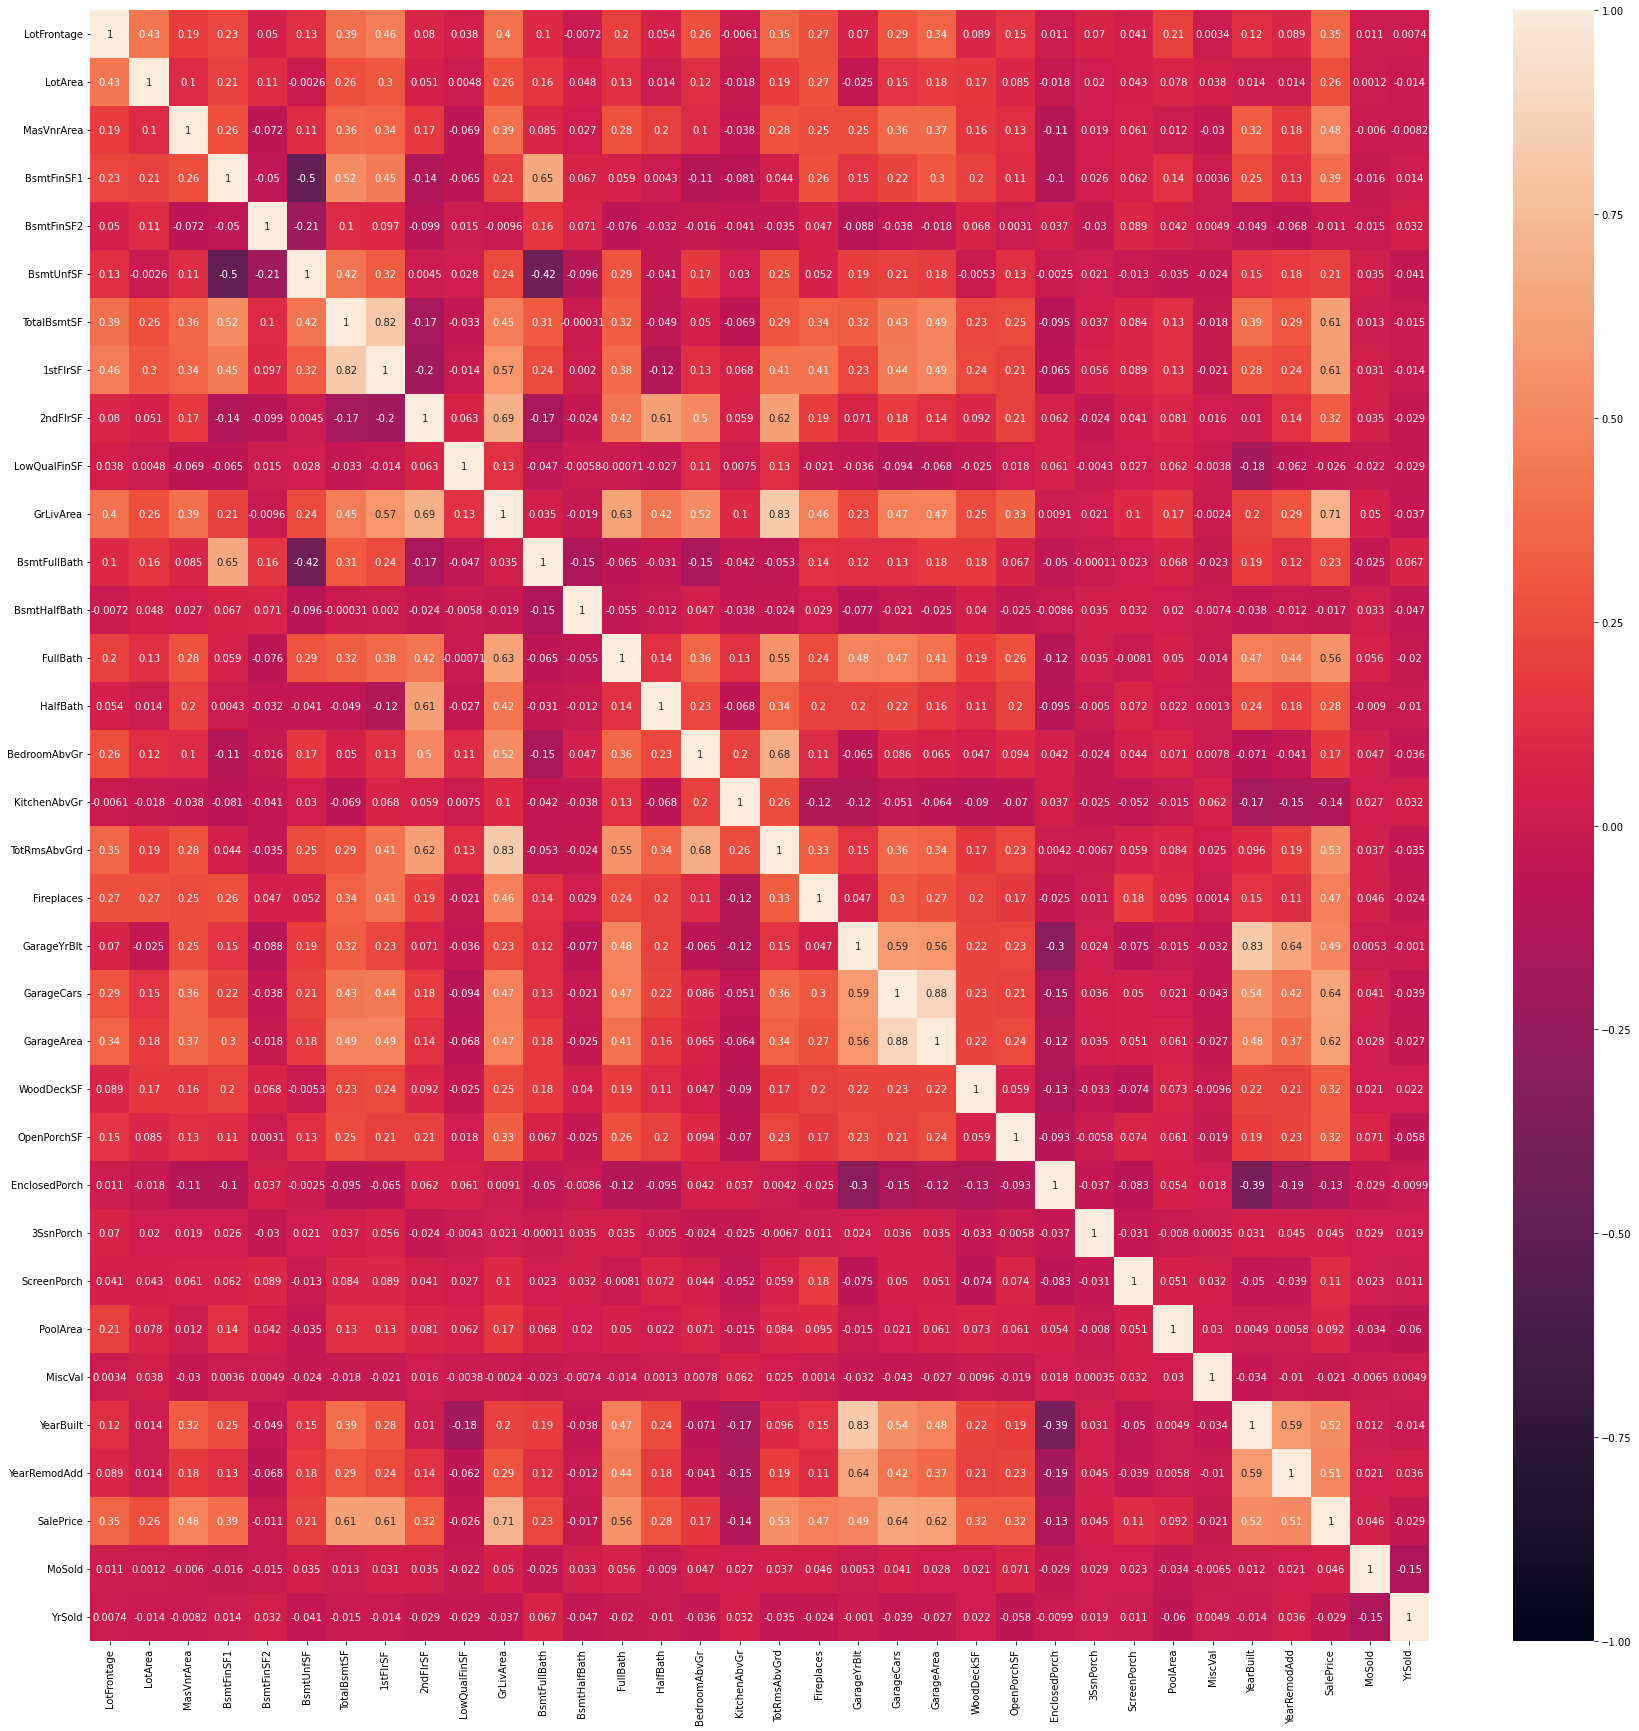

In [22]:
# Numerical variables/SalePrice Correlation

plt.figure(figsize=(30, 30))
sns.heatmap(train[num_cols].corr(),vmin=-1, vmax=1,annot=True)

There are 9 features which have correlation more than 0.5 with 'SalePrice':

- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- GrLivArea: Above grade (ground) living area square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

We can assume that bigger and newer houses' price be higher

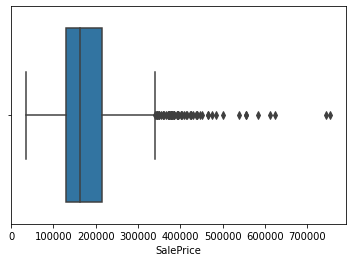

In [23]:
#Saleprice distribution
sns.boxplot(x='SalePrice',data=train);

There are some outliers or higher prices houses compared to houses in the samples.

In [24]:
train[num_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt,YearRemodAdd,SalePrice,MoSold,YrSold
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,21.954110,3.409589,15.060959,2.758904,43.489041,1971.267808,1984.865753,180921.195890,6.321918,2007.815753
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,61.119149,29.317331,55.757415,40.177307,496.123024,30.202904,20.645407,79442.502883,2.703626,1.328095
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000,1.000000,2006.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,1967.000000,129975.000000,5.000000,2007.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1973.000000,1994.000000,163000.000000,6.000000,2008.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,2004.000000,214000.000000,8.000000,2009.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,2010.000000,755000.000000,12.000000,2010.000000


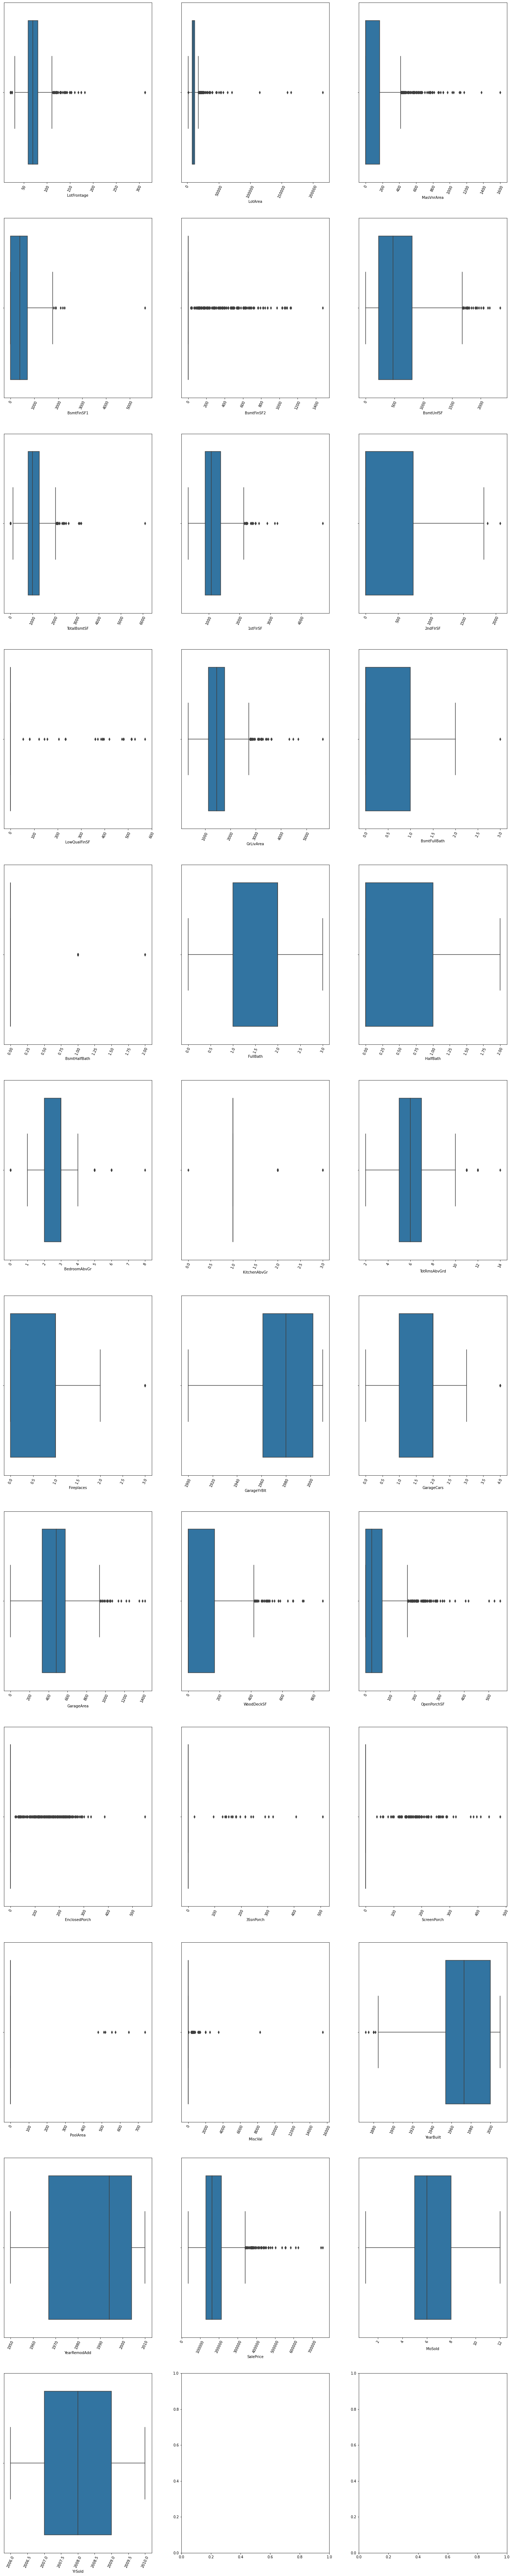

In [25]:
#Numerical variables boxplots

fig, ax = plt.subplots(12, 3, figsize=(25, 130))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(x=var, ax=subplot,data=train)
    for label in subplot.get_xticklabels():
        label.set_rotation(65)


There are features that seen rest of data points detected as outliers.

# **Data Preprocessing**

In [26]:
obj_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
#NA values changing to None

train['Alley'] = train['Alley'].astype(object).replace(np.nan, 'None')
train['MasVnrType'] = train['MasVnrType'].astype(object).replace(np.nan, 'None')
train['BsmtQual'] = train['BsmtQual'].astype(object).replace(np.nan, 'None')
train['BsmtCond'] = train['BsmtCond'].astype(object).replace(np.nan, 'None')
train['BsmtExposure'] = train['BsmtExposure'].astype(object).replace(np.nan, 'None')
train['BsmtFinType1'] = train['BsmtFinType1'].astype(object).replace(np.nan, 'None')
train['BsmtFinType2'] = train['BsmtFinType2'].astype(object).replace(np.nan, 'None')
train['FireplaceQu'] = train['FireplaceQu'].astype(object).replace(np.nan, 'None')
train['GarageFinish'] = train['GarageFinish'].astype(object).replace(np.nan, 'None')
train['GarageType'] = train['GarageType'].astype(object).replace(np.nan, 'None')
train['GarageQual'] = train['GarageQual'].astype(object).replace(np.nan, 'None')
train['GarageCond'] = train['GarageCond'].astype(object).replace(np.nan, 'None')
train['PoolQC'] = train['PoolQC'].astype(object).replace(np.nan, 'None')
train['Fence'] = train['Fence'].astype(object).replace(np.nan, 'None')
train['MiscFeature'] = train['MiscFeature'].astype(object).replace(np.nan, 'None')



In [28]:
#Na values changing to None(test set)

test['Alley'] = test['Alley'].astype(object).replace(np.nan, 'None')
test['MasVnrType'] = test['MasVnrType'].astype(object).replace(np.nan, 'None')
test['BsmtQual'] = test['BsmtQual'].astype(object).replace(np.nan, 'None')
test['BsmtCond'] = test['BsmtCond'].astype(object).replace(np.nan, 'None')
test['BsmtExposure'] = test['BsmtExposure'].astype(object).replace(np.nan, 'None')
test['BsmtFinType1'] = test['BsmtFinType1'].astype(object).replace(np.nan, 'None')
test['BsmtFinType2'] = test['BsmtFinType2'].astype(object).replace(np.nan, 'None')
test['FireplaceQu'] = test['FireplaceQu'].astype(object).replace(np.nan, 'None')
test['GarageFinish'] = test['GarageFinish'].astype(object).replace(np.nan, 'None')
test['GarageType'] = test['GarageType'].astype(object).replace(np.nan, 'None')
test['GarageQual'] = test['GarageQual'].astype(object).replace(np.nan, 'None')
test['GarageCond'] = test['GarageCond'].astype(object).replace(np.nan, 'None')
test['PoolQC'] = test['PoolQC'].astype(object).replace(np.nan, 'None')
test['Fence'] = test['Fence'].astype(object).replace(np.nan, 'None')
test['MiscFeature'] = test['MiscFeature'].astype(object).replace(np.nan, 'None')

In [29]:
# Replacing -1 on Electrical column

train['Electrical'] = train['Electrical'].astype(object).replace('-1', 'None')
test['Electrical'] = test['Electrical'].astype(object).replace('-1', 'None')

In [30]:
#train test split

from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
print("X train shape: ",X_train.shape)
print("X validation shape: ",X_val.shape)
print("y train shape: ",y_train.shape)
print("y validation shape: ",y_val.shape)


X train shape:  (1168, 79)
X validation shape:  (292, 79)
y train shape:  (1168,)
y validation shape:  (292,)


In [32]:
#Impute Missing Values for Numeric Columns

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imputed_x_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_x_val = pd.DataFrame(my_imputer.fit_transform(X_val))

#replacing columns names back
imputed_x_train.columns = X_train.columns
imputed_x_val.columns = X_val.columns

X_train = imputed_x_train
X_val = imputed_x_val

In [33]:
X_train[nominal_cols]

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,160,FV,Pave,None,Lvl,AllPub,Inside,Somerst,Norm,Norm,...,Y,SBrkr,Typ,Detchd,Unf,Y,None,None,WD,Normal
1,50,RL,Pave,Grvl,Lvl,AllPub,Inside,Edwards,Norm,Norm,...,Y,SBrkr,Typ,Detchd,Unf,Y,MnPrv,None,WD,Normal
2,160,RM,Pave,None,Lvl,AllPub,Inside,BrDale,Norm,Norm,...,Y,SBrkr,Min1,Attchd,Unf,Y,None,None,WD,Normal
3,50,RL,Pave,None,Lvl,AllPub,Inside,Edwards,Artery,Norm,...,Y,FuseA,Typ,Detchd,Unf,P,None,None,WD,Normal
4,30,RL,Pave,None,Lvl,AllPub,Inside,BrkSide,Norm,Norm,...,N,FuseF,Typ,Detchd,Unf,P,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,Pave,None,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,Y,SBrkr,Min1,Detchd,Unf,Y,GdWo,None,WD,Normal
1164,60,RL,Pave,None,Lvl,AllPub,Inside,CollgCr,Norm,Norm,...,Y,SBrkr,Typ,BuiltIn,RFn,Y,None,None,New,Partial
1165,30,RM,Pave,None,Lvl,AllPub,Inside,IDOTRR,Norm,Norm,...,N,SBrkr,Typ,Detchd,Unf,P,None,None,WD,Normal
1166,20,RL,Pave,None,Lvl,AllPub,CulDSac,Sawyer,RRAe,Norm,...,Y,SBrkr,Min2,Attchd,RFn,Y,None,None,WD,Normal


In [34]:
#One Hot Encoding for Categorical(Nominal) Features

from sklearn.preprocessing import OneHotEncoder

#Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[nominal_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[nominal_cols]))

#One-hot encoding removed index then put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index

#Remove categorical columns(will replace with one-hot encoding)
num_X_train = X_train.drop(nominal_cols, axis=1)
num_X_val = X_val.drop(nominal_cols, axis=1)

#Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
X_val = pd.concat([num_X_val, OH_cols_valid], axis=1)

In [35]:
#Ordinal Encoding for Categorical(Ordinal) Features

from sklearn.preprocessing import OrdinalEncoder

LotShape_cat = ['Reg','IR1','IR2','IR3']
LandSlope_cat = ['Gtl','Mod','Sev']
OverallQual_cat = [1,2,3,4,5,6,7,8,9,10]
OverallCond_cat = [1,2,3,4,5,6,7,8,9,10]
ExterQual_cat = ['Ex','Gd','TA','Fa','Po']
ExterCond_cat = ['Ex','Gd','TA','Fa','Po']
BsmtQual_cat = ['Ex','Gd','TA','Fa','Po','None']
BsmtCond_cat = ['Ex','Gd','TA','Fa','Po','None']
BsmtExposure_cat = ['Gd','Av','Mn','No','None']
BsmtFinType1_cat = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
BsmtFinType2_cat = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']
HeatingQC_cat = ['Ex','Gd','TA','Fa','Po']
KitchenQual_cat = ['Ex','Gd','TA','Fa','Po']
FireplaceQu_cat = ['Ex','Gd','TA','Fa','Po','None']
GarageQual_cat = ['Ex','Gd','TA','Fa','Po','None']
GarageCond_cat = ['Ex','Gd','TA','Fa','Po','None']
PoolQC_cat = ['Ex','Gd','TA','Fa','None']

OR_encoder = OrdinalEncoder(categories = [LotShape_cat, LandSlope_cat, OverallQual_cat, 
                             OverallCond_cat, ExterQual_cat, ExterCond_cat,
                             BsmtQual_cat, BsmtCond_cat, BsmtExposure_cat, 
                             BsmtFinType1_cat, BsmtFinType2_cat, HeatingQC_cat,
                             KitchenQual_cat, FireplaceQu_cat, GarageQual_cat, 
                             GarageCond_cat, PoolQC_cat])
OR_cols_train = pd.DataFrame(OR_encoder.fit_transform(X_train[ordinal_cols]))  
OR_cols_valid = pd.DataFrame(OR_encoder.fit_transform(X_val[ordinal_cols]))

#Removed index; put it back
OR_cols_train.index = X_train.index
OR_cols_valid.index = X_val.index

# Remove categorical columns
num_X_train = X_train.drop(ordinal_cols, axis=1)
num_X_valid = X_val.drop(ordinal_cols, axis=1)

# Add ordinal encoded columns to numerical features
X_train = pd.concat([num_X_train, OR_cols_train], axis=1)
X_val = pd.concat([num_X_valid, OR_cols_valid], axis=1)

# **Base Model**

In [36]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

print('mae: ',mean_absolute_error(y_val,y_pred))
print('mse: ',mean_squared_error(y_val,y_pred))
print('rmse: ',mean_squared_error(y_val,y_pred,squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))


mae:  18515.882601520083
mse:  778507165.660551
rmse:  27901.741265744527
target_mean: 180921.19589041095
target_std: 79415.29188606751


There are 5 assumptions from Linear Regression:

- Linear relationship, sensitive to outliers. (Scatter Plot, Boxplot)
- Multivariate normality, for both response and predictors, Histogram or Q-Q plot. (Kolmogorov-Smirnov, Transformation)
- No or little multicollinearity, independent variables should not be too highly correlated between each other. (Pearson Correlation, Tolerance, VIF, Condition Index - Factor Analysis. Remove one of highly correlated independent variable)
- No auto-correlation, residuals should be independent from each other. In other words when the value of y(x+1) should be independent from the value of y(x). (Durbin-Watson’s d)
- Homoscedasticity, residuals are equal across the regression line. (Goldfeld-Quandt, non-linear correction)

In [37]:
#Feature Importance

X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

for colname in X.select_dtypes('object'):
    X[colname],_ = X[colname].factorize(na_sentinel=None)
    
discrete_features = X.dtypes == int

my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
impute_X = pd.DataFrame(my_imputer.fit_transform(X))
impute_X.columns = X.columns
X = impute_X 

In [38]:
#Mutual Information

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y,discrete_features):
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores,name='MI Scores',index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X,y,discrete_features)

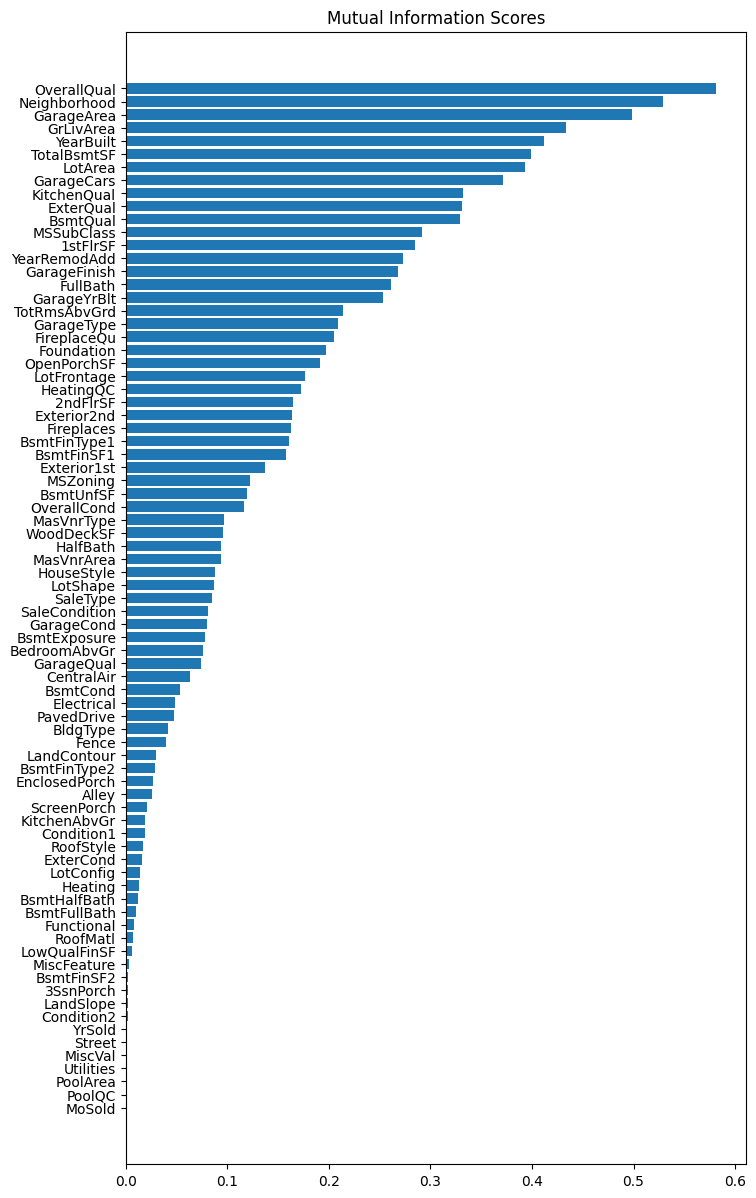

In [39]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')
    
plt.figure(dpi=100,figsize=(8,15))
plot_mi_scores(mi_scores)    
    

In [40]:
len(mi_scores)

79

In [41]:
mi_scores[0:20]

OverallQual     0.581508
Neighborhood    0.529243
GarageArea      0.498403
GrLivArea       0.433185
YearBuilt       0.411524
TotalBsmtSF     0.398996
LotArea         0.393575
GarageCars      0.371826
KitchenQual     0.332026
ExterQual       0.331041
BsmtQual        0.329483
MSSubClass      0.291175
1stFlrSF        0.284275
YearRemodAdd    0.272473
GarageFinish    0.267768
FullBath        0.261236
GarageYrBlt     0.253539
TotRmsAbvGrd    0.214336
GarageType      0.209280
FireplaceQu     0.204710
Name: MI Scores, dtype: float64

In [42]:
#Select K-Best
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2)
selector.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x7f1100ecf9e0>)

In [43]:
from numpy import array 

filter = selector.get_support()
features = array(X.columns)

features[filter]

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PoolArea', 'MiscVal'],
      dtype=object)

# **Model Selection with Feature Importance**

In [44]:
from sklearn.model_selection import train_test_split

y = train['SalePrice']
X = train[['OverallQual','Neighborhood','GarageArea','GrLivArea',
          'YearBuilt','TotalBsmtSF','LotArea','GarageCars',
          'BsmtQual','ExterQual','KitchenQual','MSSubClass',
          '1stFlrSF','YearRemodAdd','GarageFinish','FullBath',
          'GarageYrBlt','TotRmsAbvGrd','FireplaceQu','GarageType']]

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=5)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

numerical_cols = [col for col in X.columns if col not in obj_cols]
nominal_cols = [col for col in X.columns if col in nominal_cols]
ordinal_cols = [col for col in X.columns if col in ordinal_cols]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('onehot',OneHotEncoder(handle_unknown='ignore'))])

ordinal_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('ordinal',OrdinalEncoder(categories=[OverallQual_cat,BsmtQual_cat,ExterQual_cat,
                                           KitchenQual_cat,FireplaceQu_cat]))
])



In [46]:
preprocessor = ColumnTransformer(
transformers = [
    ('num',numerical_transformer,numerical_cols),
    ('nom',nominal_transformer,nominal_cols),
    ('ord',ordinal_transformer,ordinal_cols)
])

model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',model)])

pipeline.fit(X_train,y_train)
y_pred= pipeline.predict(X_val)

print('mae:',mean_absolute_error(y_val, y_pred,))
print('mse:',mean_squared_error(y_val, y_pred))
print('rmse:',mean_squared_error(y_val, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))

mae: 21113.07296829989
mse: 1107771937.3936584
rmse: 33283.208039395155
target_mean: 180921.19589041095
target_std: 79415.29188606751


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

numerical_cols = [col for col in X.columns if col not in obj_cols]

nominal_cols = [col for col in X.columns if col in nominal_cols]

ordinal_cols = [col for col in X.columns if col in ordinal_cols]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[OverallQual_cat,BsmtQual_cat,ExterQual_cat,
                                           KitchenQual_cat,FireplaceQu_cat]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print('mae:',mean_absolute_error(y_val, y_pred,))
print('mse:',mean_squared_error(y_val, y_pred))
print('rmse:',mean_squared_error(y_val, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))

mae: 17499.781276755137
mse: 632883266.0796146
rmse: 25157.171265458575
target_mean: 180921.19589041095
target_std: 79415.29188606751


In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

numerical_cols = [col for col in X.columns if col not in obj_cols]

nominal_cols = [col for col in X.columns if col in nominal_cols]

ordinal_cols = [col for col in X.columns if col in ordinal_cols]

numerical_transformer = SimpleImputer(strategy='most_frequent')

nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[OverallQual_cat,BsmtQual_cat,ExterQual_cat,
                                           KitchenQual_cat,FireplaceQu_cat]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('nom', nominal_transformer, nominal_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

model = RandomForestRegressor(random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

print('mae:',mean_absolute_error(y_val, y_pred,))
print('mse:',mean_squared_error(y_val, y_pred))
print('rmse:',mean_squared_error(y_val, y_pred, squared=False))
print('target_mean:',y.mean())
print('target_std:',np.std(y))

mae: 17040.763150684932
mse: 624322296.1864465
rmse: 24986.44224747586
target_mean: 180921.19589041095
target_std: 79415.29188606751


# **Testing**

In [49]:
X_test = test[X.columns]
test_preds = pipeline.predict(X_test)

In [50]:
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': test_preds})
output.to_csv('submission.csv',index=False)